<a href="https://colab.research.google.com/github/chien2734/sgu_data_analyst/blob/main/WHO_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## --- 1. Import thư viện ---

In [ ]:
!pip install world_bank_data

In [ ]:
import pandas as pd
import world_bank_data as wb

## --- 2. Đọc dữ liệu từ WHO ---

In [ ]:
# Đọc dữ liệu từ file tải về

url = "https://raw.githubusercontent.com/NAizdabezt/who-covid19-dashboard/main/data/raw/WHO-COVID-19-global-daily-data.csv"
df = pd.read_csv(url)

print("Kích thước dữ liệu:", df.shape)
df.head()


Kích thước dữ liệu: (502800, 8)


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AF,Afghanistan,EMR,NaN,0,NaN,0
1,2020-01-04,DZ,Algeria,AFR,NaN,0,NaN,0
2,2020-01-04,AL,Albania,EUR,NaN,0,NaN,0
3,2020-01-04,AI,Anguilla,AMR,NaN,0,NaN,0
4,2020-01-04,AS,American Samoa,WPR,0.0,0,0.0,0


In [ ]:
# Lấy dữ liệu dân số mới nhất
pop = wb.get_series('SP.POP.TOTL', id_or_value='id', simplify_index=True)

# Reset index -> có thể có 3 cột: Country_code3, Year, Population
pop = pop.reset_index()
pop.columns = ['Country_code3', 'Year', 'Population']

# Lấy dân số mới nhất theo từng quốc gia
pop_latest = pop.sort_values('Year').drop_duplicates('Country_code3', keep='last')

print(pop_latest.head())

      Country_code3  Year  Population
17029           VIR  2024    104377.0
17094           PSE  2024   5289152.0
17159           YEM  2024  40583164.0
17224           ZMB  2024  21314956.0
8644            GUY  2024    831087.0


###Kiểm tra và chuẩn hóa tên cột

In [ ]:
# Hiển thị các cột ban đầu
print(df.columns)

# Chuẩn hóa tên cột: loại bỏ khoảng trắng và ký tự đặc biệt
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("/", "_")
print("\nTên cột sau khi chuẩn hóa:")
print(df.columns)

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

Tên cột sau khi chuẩn hóa:
Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')


### Chuyển kiểu dữ liệu ngày tháng

In [ ]:
# Chuyển cột Date_reported sang datetime
df['Date_reported'] = pd.to_datetime(df['Date_reported'], errors='coerce')

# Kiểm tra xem có giá trị null sau khi chuyển không
print("Số dòng bị lỗi ngày:", df['Date_reported'].isna().sum())

Số dòng bị lỗi ngày: 0


###Kiểm tra dữ liệu thiếu và trùng

In [ ]:
# Số lượng giá trị null
print("\nSố lượng giá trị thiếu theo cột:")
print(df.isnull().sum())

# Kiểm tra dòng trùng
print("\nSố dòng trùng:", df.duplicated().sum())

# Loại bỏ dòng trùng (nếu có)
df = df.drop_duplicates()



Số lượng giá trị thiếu theo cột:
Date_reported             0
Country_code           2095
Country                   0
WHO_region                0
New_cases            291580
Cumulative_cases          0
New_deaths           348527
Cumulative_deaths         0
dtype: int64

Số dòng trùng: 0


###Kiểm tra và xử lý dữ liệu bất thường

In [ ]:
# Xem các giá trị âm trong số ca hoặc tử vong
cols_check = ['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
for col in cols_check:
    neg = df[df[col] < 0]
    print(f"{col}: {len(neg)} dòng giá trị âm")

# Nếu có giá trị âm, thay bằng NaN (coi là dữ liệu lỗi)
df[cols_check] = df[cols_check].apply(lambda x: x.mask(x < 0))


New_cases: 60 dòng giá trị âm
Cumulative_cases: 0 dòng giá trị âm
New_deaths: 30 dòng giá trị âm
Cumulative_deaths: 0 dòng giá trị âm


### Tổng quan nhanh dữ liệu sau khi làm sạch

In [ ]:
print("\nSau khi làm sạch:")
print(df.info())
print(df.describe())


Sau khi làm sạch:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502800 entries, 0 to 502799
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      502800 non-null  datetime64[ns]
 1   Country_code       500705 non-null  object        
 2   Country            502800 non-null  object        
 3   WHO_region         502800 non-null  object        
 4   New_cases          211160 non-null  float64       
 5   Cumulative_cases   502800 non-null  int64         
 6   New_deaths         154243 non-null  float64       
 7   Cumulative_deaths  502800 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 30.7+ MB
None
                       Date_reported     New_cases  Cumulative_cases  \
count                         502800  2.111600e+05      5.028000e+05   
mean   2022-11-16 00:00:00.000000256  3.688310e+03      2.076666e+06   
min     

Kết quả sau bước này:

- Dữ liệu đã sạch, không lỗi, không âm, cột ngày chuẩn.

- Sẵn sàng cho EDA (phân tích khám phá dữ liệu).

##EDA (Exploratory Data Analysis)

###Tổng quan dữ liệu

Mục tiêu: xem xu hướng tổng thể toàn cầu.

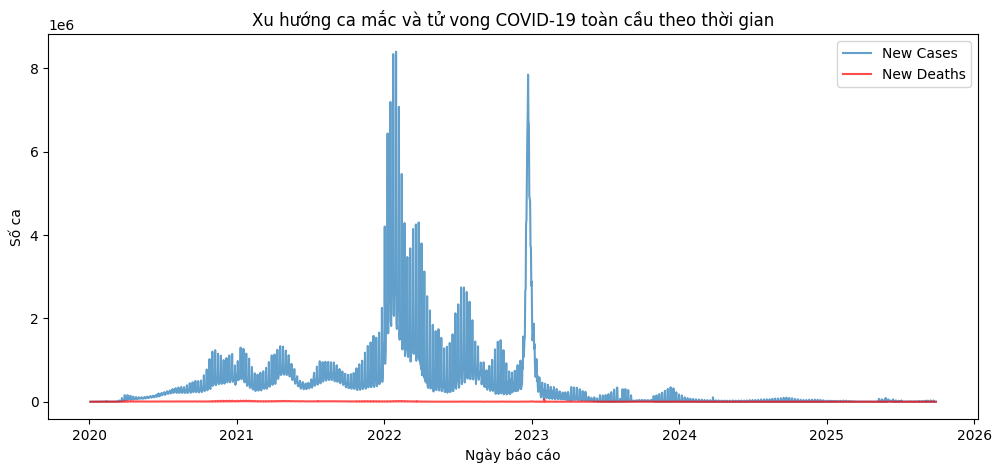

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Đảm bảo cột ngày có định dạng chuẩn
df['Date_reported'] = pd.to_datetime(df['Date_reported'], errors='coerce')

# Tổng ca và tử vong theo thời gian
global_trend = df.groupby('Date_reported')[['New_cases', 'New_deaths']].sum()

plt.figure(figsize=(12,5))
plt.plot(global_trend.index, global_trend['New_cases'], label='New Cases', alpha=0.7)
plt.plot(global_trend.index, global_trend['New_deaths'], label='New Deaths', alpha=0.7, color='red')
plt.title('Xu hướng ca mắc và tử vong COVID-19 toàn cầu theo thời gian')
plt.xlabel('Ngày báo cáo')
plt.ylabel('Số ca')
plt.legend()
plt.show()


###Top 10 quốc gia có tổng số ca cao nhấ

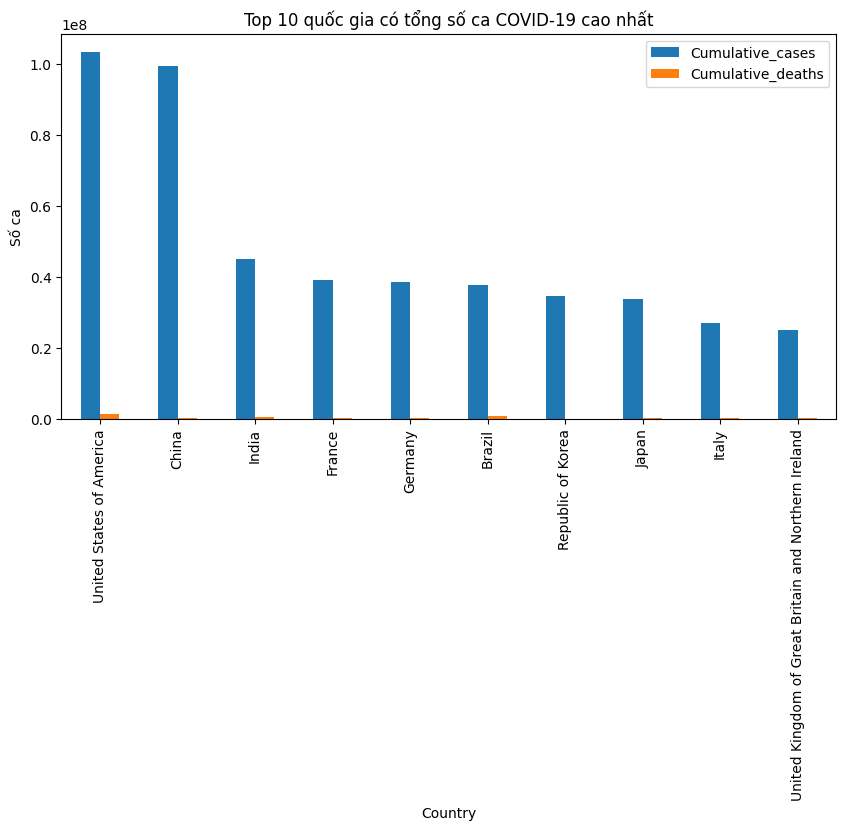

In [ ]:
top_countries = (
    df.groupby('Country')[['Cumulative_cases', 'Cumulative_deaths']]
    .max()
    .sort_values('Cumulative_cases', ascending=False)
    .head(10)
)

top_countries.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 quốc gia có tổng số ca COVID-19 cao nhất')
plt.ylabel('Số ca')
plt.show()


###Phân bố ca nhiễm theo khu vực (WHO Region)

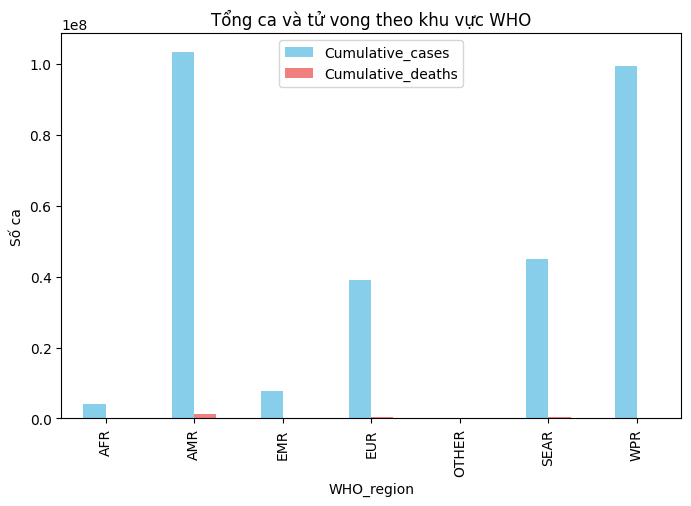

In [ ]:
region_summary = df.groupby('WHO_region')[['Cumulative_cases', 'Cumulative_deaths']].max()

region_summary.plot(kind='bar', figsize=(8,5), color=['skyblue', 'lightcoral'])
plt.title('Tổng ca và tử vong theo khu vực WHO')
plt.ylabel('Số ca')
plt.show()


###Xu hướng ca mới theo tháng

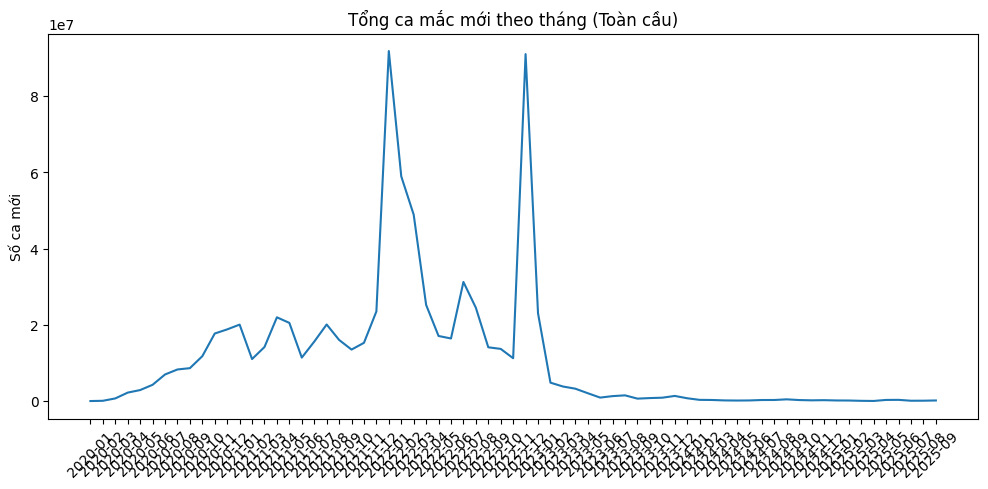

In [ ]:
df['YearMonth'] = df['Date_reported'].dt.to_period('M')
monthly_cases = df.groupby('YearMonth')['New_cases'].sum()

plt.figure(figsize=(12,5))
plt.plot(monthly_cases.index.astype(str), monthly_cases.values)
plt.title('Tổng ca mắc mới theo tháng (Toàn cầu)')
plt.xticks(rotation=45)
plt.ylabel('Số ca mới')
plt.show()


###Kiểm tra mối tương quan cơ bản

In [ ]:
corr = df[['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']].corr()
print(corr)


                   New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
New_cases           1.000000          0.160439    0.268913           0.150638
Cumulative_cases    0.160439          1.000000    0.201229           0.784538
New_deaths          0.268913          0.201229    1.000000           0.347025
Cumulative_deaths   0.150638          0.784538    0.347025           1.000000


###Bản đồ nhiệt (Heatmap) thể hiện tổng ca COVID-19 theo quốc gia

In [ ]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 58.5 MB/s eta 0:00:00


In [ ]:
!pip install countryinfo


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.2/602.2 kB 11.3 MB/s eta 0:00:00


In [ ]:
!pip install fuzzywuzzy

#### Xử lý dữ liệu bị thiếu

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasets/population/master/data/population.csv"

# Đọc dữ liệu
pop = pd.read_csv(url)

# Lấy năm mới nhất (2023 hoặc 2024)
pop_latest = pop.sort_values('Year').drop_duplicates('Country Code', keep='last')
pop_latest = pop_latest.rename(columns={'Country Code': 'Country_code3', 'Value': 'Population'})

print(pop_latest.head())
print(len(pop_latest), "quốc gia được lấy")

                     Country Name Country_code3  Year   Population
16929                    Zimbabwe           ZWE  2023   16340822.0
63                          Aruba           ABW  2023     107359.0
7103                      Ireland           IRL  2023    5307600.0
15585                     Turkiye           TUR  2023   85325965.0
255    Africa Western and Central           AFW  2023  509398589.0
265 quốc gia được lấy


In [ ]:
!pip install pycountry

In [ ]:
!pip install fuzzywuzzy

In [ ]:
import pycountry
from fuzzywuzzy import process
import plotly.express as px
import pandas as pd

# --- 1. Hàm chuyển Alpha-2 sang Alpha-3 ---
def alpha2_to_alpha3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# --- 2. Hàm dò tên quốc gia nếu mã lỗi ---
def get_country_code3_by_name(name):
    try:
        choices = [c.name for c in pycountry.countries]
        match = process.extractOne(name, choices)
        if match and match[1] > 80:
            return pycountry.countries.get(name=match[0]).alpha_3
    except:
        return None

# --- 3. Lấy dữ liệu COVID mới nhất theo từng quốc gia ---
latest = (
    df.sort_values('Date_reported')
      .drop_duplicates('Country', keep='last')
      .reset_index(drop=True)
)

# --- 4. Chuẩn hóa tên quốc gia ---
latest['Country_clean'] = latest['Country'].replace({
    'Cura�ao': 'Curacao',
    'Saint Martin (French part)': 'Saint Martin',
    'Sao Tome and Principe': 'Sao Tome and Principe',
    'British Virgin Islands': 'British Virgin Islands',
    'Turks and Caicos Islands': 'Turks and Caicos Islands',
    'Pitcairn': 'Pitcairn Islands',
    'Montenegro': 'Montenegro',
    'Gambia': 'Gambia',
    'Falkland Islands (Malvinas)': 'Falkland Islands',
    'United States Virgin Islands': 'United States Virgin Islands',
    'Bonaire, Sint Eustatius and Saba': 'Bonaire',
    'Bahamas': 'Bahamas',
    'Andorra': 'Andorra',
    'occupied Palestinian territory, including east Jerusalem': 'Palestine',
    'Sint Maarten (Dutch part)': 'Sint Maarten',
    'R�union': 'Reunion',
    'North Macedonia': 'Macedonia',
    'Saint Barthelemy': 'Saint Barthelemy',
    'Netherlands (Kingdom of the)': 'Netherlands',
    'Micronesia (Federated States of)': 'Micronesia',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Czechia': 'Czech Republic',
    'Eswatini': 'Swaziland',
    'Cabo Verde': 'Cape Verde',
    'Brunei Darussalam': 'Brunei',
    'Timor-Leste': 'East Timor',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Holy See': 'Vatican City',
    'Kosovo (in accordance with UN Security Council Resolution 1244 (1999))': 'Kosovo',
    'Côte d’Ivoire': 'Ivory Coast',
    'Türkiye': 'Turkey',
    'Viet Nam': 'Vietnam',
    "Lao People's Democratic Republic": 'Laos',
    'Iran (Islamic Republic of)': 'Iran',
    'Republic of Korea': 'South Korea',
    'Syrian Arab Republic': 'Syria',
    'Russian Federation': 'Russia',
    'Venezuela (Bolivarian Republic of)': 'Venezuela'
})

# --- 5. Lấy mã ISO3 ---
latest['Country_code3'] = latest['Country_code'].apply(alpha2_to_alpha3)
latest['Country_code3'] = latest.apply(
    lambda r: get_country_code3_by_name(r['Country_clean']) if pd.isna(r['Country_code3']) else r['Country_code3'],
    axis=1
)
special_codes = {'Taiwan': 'TWN', 'Palestine': 'PSE', 'Kosovo': 'XKX'}
latest['Country_code3'] = latest.apply(
    lambda r: special_codes.get(r['Country_clean'], r['Country_code3']),
    axis=1
)

# --- 6. Lấy dữ liệu dân số mới nhất từ GitHub (World Bank mirror) ---
url = "https://raw.githubusercontent.com/datasets/population/master/data/population.csv"
pop = pd.read_csv(url)
pop_latest = (
    pop.sort_values('Year')
       .drop_duplicates('Country Code', keep='last')
       .rename(columns={'Country Code': 'Country_code3', 'Value': 'Population'})
       [['Country_code3', 'Population']]
)

# --- 7. Thêm dân số thủ công cho vùng/lãnh thổ bị thiếu ---
manual_pop = {
    'TWN': 23860000, 'XKX': 1840000, 'PSE': 5400000, 'VGB': 31000,
    'REU': 870000, 'GLP': 400000, 'MTQ': 370000, 'GUF': 300000,
    'CUW': 153000, 'SXM': 44000, 'BES': 26000, 'MAF': 38000,
    'AND': 79000, 'VAT': 800, 'MSR': 4900, 'BLM': 10000, 'PCN': 50,
    # bổ sung 11 vùng thiếu
    'SHN': 6000,   # Saint Helena
    'MYT': 280000, # Mayotte
    'TKL': 1500,   # Tokelau
    'WLF': 12000,  # Wallis and Futuna
    'NIU': 1600,   # Niue
    'SPM': 6000,   # Saint Pierre and Miquelon
    'COK': 18000,  # Cook Islands
    'AIA': 15000,  # Anguilla
    'GGY': 67000,  # Guernsey
    'JEY': 108000, # Jersey
    'FLK': 3500,   # Falkland Islands
}
manual_df = pd.DataFrame(list(manual_pop.items()), columns=['Country_code3', 'Population'])
pop_latest = pd.concat([pop_latest, manual_df], ignore_index=True)

# --- 8. Ghép dân số vào bảng latest ---
latest = latest.merge(pop_latest, on='Country_code3', how='left')

# --- 9. Loại bỏ dòng không phải quốc gia ---
latest = latest[~latest['Country'].str.contains("International conveyance|vessel", case=False, na=False)]

# --- 10. Tính tỷ lệ ---
latest['Cases_per_million'] = latest.apply(
    lambda r: r['Cumulative_cases'] / (r['Population'] / 1_000_000)
    if pd.notnull(r['Population']) and r['Population'] > 0 else None,
    axis=1
)
latest['Fatality_rate'] = latest.apply(
    lambda r: r['Cumulative_deaths'] / r['Cumulative_cases'] * 100
    if r['Cumulative_cases'] > 0 else 0,
    axis=1
)

# --- 11. Kiểm tra ---
print("⚠️ Quốc gia thiếu mã ISO3:", latest['Country_code3'].isna().sum())
print("⚠️ Quốc gia thiếu dân số:", latest['Population'].isna().sum())
print("Danh sách thiếu dân số:", latest[latest['Population'].isna()]['Country_clean'].tolist())

# # --- 12. Lưu file ---
# df.to_csv("/content/drive/MyDrive/dataWHO/df_clean.csv", index=False)
# latest.to_csv("/content/drive/MyDrive/dataWHO/latest.csv", index=False)
# print("✅ Lưu xong 2 file CSV.")


/usr/local/lib/python3.12/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


⚠️ Quốc gia thiếu mã ISO3: 0
⚠️ Quốc gia thiếu dân số: 0
Danh sách thiếu dân số: []


#### Bản đồ 2D

In [ ]:
# --- 10. Vẽ bản đồ ---
fig = px.choropleth(
    latest,
    locations="Country_code3",
    color="Cases_per_million",
    hover_name="Country",
    color_continuous_scale="Reds",
    title="Tỷ lệ ca COVID-19 trên 1 triệu dân theo quốc gia (dữ liệu mới nhất)",
    projection="natural earth"
)
fig.update_layout(coloraxis_colorbar_title="Ca/1 triệu dân")
fig.show()

#### Bản đồ 3D


In [ ]:
import plotly.graph_objects as go

# Tạo globe
fig = go.Figure(go.Choropleth(
    locations = latest['Country_code3'],   # Mã ISO3
    z = latest['Cases_per_million'],       # Giá trị màu
    text = latest['Country'] + "<br>" + \
           "Population: " + latest['Population'].astype(str) + "<br>" + \
           "Cumulative cases: " + latest['Cumulative_cases'].astype(str),
    colorscale = 'Reds',
    colorbar_title = 'Ca/1 triệu dân',
    marker_line_color='black',             # viền quốc gia
    marker_line_width=0.5
))

# Thiết lập projection kiểu globe (quả cầu)
fig.update_geos(
    projection_type="orthographic",
    showcountries=True,
    showcoastlines=True,
    showocean=True,
    showland=True,
    landcolor="LightGreen",
    oceancolor="LightBlue",
    lataxis_showgrid=True,
    lonaxis_showgrid=True,
)

# Thêm tiêu đề
fig.update_layout(
    title_text='Tỷ lệ ca COVID-19 trên 1 triệu dân theo quốc gia (Interactive Globe)',
    margin={"r":0,"t":50,"l":0,"b":0}
)

# Hiển thị interactive globe
fig.show()


#### Bản đồ 3D rotate

In [ ]:
import plotly.graph_objects as go
import numpy as np

# --- Tạo globe ---
fig = go.Figure(go.Choropleth(
    locations = latest['Country_code3'],
    z = latest['Cases_per_million'],
    text = latest['Country'] + "<br>" +
           "Population: " + latest['Population'].astype(str) + "<br>" +
           "Cumulative cases: " + latest['Cumulative_cases'].astype(str),
    colorscale = 'Reds',
    colorbar_title = 'Ca/1 triệu dân',
    marker_line_color='black',
    marker_line_width=0.5
))

# Thiết lập geos (projection quả cầu)
fig.update_geos(
    projection_type="orthographic",
    showcountries=True,
    showcoastlines=True,
    showocean=True,
    showland=True,
    landcolor="LightGreen",
    oceancolor="LightBlue"
)

# --- Tạo frames để quay globe ---
frames = []
for lon in np.arange(0, 360, 5):  # quay 5 độ mỗi frame
    frames.append(go.Frame(layout=dict(geo=dict(projection_rotation=dict(lon=lon, lat=0)))))

fig.frames = frames

# --- Cập nhật layout với animation ---
fig.update_layout(
    title_text='Tỷ lệ ca COVID-19 trên 1 triệu dân theo quốc gia (Rotating Globe)',
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(label="Play",
                      method="animate",
                      args=[None, {"frame": {"duration": 100, "redraw": True},
                                   "fromcurrent": True,
                                   "transition": {"duration": 0}}])])]
)

# Hiển thị globe
fig.show()


###Biểu đồ tương tác: xu hướng theo thời gian của từng quốc gia

In [ ]:
# Chọn top 5 quốc gia có nhiều ca nhất
top5 = (
    df.groupby('Country')['Cumulative_cases']
    .max()
    .sort_values(ascending=False)
    .head(5)
    .index
)

fig = px.line(
    df[df['Country'].isin(top5)],
    x='Date_reported',
    y='Cumulative_cases',
    color='Country',
    title="Xu hướng lây nhiễm COVID-19 theo thời gian (Top 5 quốc gia)",
    markers=True
)
fig.update_layout(hovermode="x unified")
fig.show()


###Biểu đồ hộp (boxplot) cho tỷ lệ tử vong theo khu vực

In [ ]:
who_region_map = {
    'AFR': 'Africa',
    'AMR': 'Americas',
    'EMR': 'Eastern Mediterranean',
    'EUR': 'Europe',
    'SEAR': 'South-East Asia',
    'WPR': 'Western Pacific'
}

latest['WHO_region_name'] = latest['WHO_region'].map(who_region_map)


In [ ]:
# --- Tạo cột hiển thị bằng tiếng Việt với định dạng số ---
latest['Số ca tích lũy'] = latest['Cumulative_cases'].apply(lambda x: f"{x:,}".replace(",", "."))
latest['Số ca tử vong tích lũy'] = latest['Cumulative_deaths'].apply(lambda x: f"{x:,}".replace(",", "."))
latest['Tỷ lệ tử vong (%)'] = latest['Fatality_rate'].apply(lambda x: f"{x:.2f}")

# --- Vẽ boxplot ---
fig = px.box(
    latest,
    x='WHO_region_name',
    y='Tỷ lệ tử vong (%)',
    color='WHO_region_name',
    points='all',
    title="Phân bố tỷ lệ tử vong theo khu vực WHO",
    hover_data=['Country', 'Số ca tích lũy', 'Số ca tử vong tích lũy']
)

fig.update_traces(
    marker=dict(size=4, opacity=0.6),
    line=dict(width=2)
)
fig.update_layout(showlegend=False)
fig.show()


In [ ]:
# --- 1. Map WHO_region sang tên đầy đủ ---
who_region_map = {
    'AFR': 'Châu Phi',
    'AMR': 'Châu Mỹ',
    'EMR': 'Đông Địa Trung Hải',
    'EUR': 'Châu Âu',
    'SEAR': 'Đông Nam Á',
    'WPR': 'Tây Thái Bình Dương'
}

latest['WHO_region_name'] = latest['WHO_region'].map(who_region_map)

# --- 2. Đảm bảo mỗi quốc gia 1 dòng (ưu tiên vùng theo thứ tự) ---
priority = ['Đông Nam Á', 'Tây Thái Bình Dương', 'Châu Âu', 'Châu Phi', 'Châu Mỹ', 'Đông Địa Trung Hải']
latest['region_priority'] = latest['WHO_region_name'].apply(lambda x: priority.index(x) if x in priority else 99)
latest = latest.sort_values('region_priority').drop_duplicates('Country', keep='first')
latest.drop(columns='region_priority', inplace=True)

# --- 3. Tạo cột hiển thị bằng tiếng Việt và định dạng số ---
latest['Số ca tích lũy'] = latest['Cumulative_cases'].apply(lambda x: f"{x:,}".replace(",", "."))
latest['Số ca tử vong tích lũy'] = latest['Cumulative_deaths'].apply(lambda x: f"{x:,}".replace(",", "."))
latest['Tỷ lệ tử vong (%)'] = latest['Fatality_rate'].apply(lambda x: f"{x:.2f}")

# --- 4. Vẽ boxplot ---
fig = px.box(
    latest,
    x='WHO_region_name',
    y='Tỷ lệ tử vong (%)',
    color='WHO_region_name',
    points='all',
    title="Phân bố tỷ lệ tử vong theo khu vực WHO",
    hover_data=['Country', 'Số ca tích lũy', 'Số ca tử vong tích lũy']
)

fig.update_traces(marker=dict(size=4, opacity=0.6),
                  line=dict(width=2))
fig.update_layout(showlegend=False)
fig.show()


Lưu ý về phân vùng WHO:

- WHO chia thế giới thành 6 khu vực y tế: Châu Phi (AFR), Châu Mỹ (AMR), Đông Địa Trung Hải (EMR), Châu Âu (EUR), Đông Nam Á (SEAR), Tây Thái Bình Dương (WPR).

- Việt Nam được WHO phân loại thuộc Tây Thái Bình Dương (WPR). Do đó trên biểu đồ boxplot, Việt Nam xuất hiện trong vùng này.

- Phân vùng này dựa trên quy chuẩn WHO, không phải lỗi dữ liệu.

####Tổng số ca và tử vong theo WHO region

In [ ]:
import plotly.express as px

# Tổng số ca theo WHO region
cases_region = latest.groupby('WHO_region_name')[['Cumulative_cases', 'Cumulative_deaths']].sum().reset_index()

import plotly.express as px
fig = px.bar(cases_region, x='WHO_region_name', y=['Cumulative_cases', 'Cumulative_deaths'],
             barmode='group', title="Tổng số ca và tử vong theo WHO region")
fig.show()


In [ ]:
fig = px.box(latest, x='WHO_region_name', y='Fatality_rate',
             color='WHO_region_name', points='all',
             title="Phân bố tỷ lệ tử vong theo WHO region")
fig.show()

####Top 10 quốc gia có ca/1 triệu dân cao nhất

In [ ]:
top_cases_pm = latest.nlargest(10, 'Cases_per_million')[['Country_clean', 'Cases_per_million']]
fig = px.bar(top_cases_pm, x='Country_clean', y='Cases_per_million',
             title="Top 10 quốc gia theo ca/1 triệu dân")
fig.show()


####Top 10 quốc gia có tỷ lệ tử vong cao nhất

In [ ]:
top_fatality = latest.nlargest(10, 'Fatality_rate')[['Country_clean', 'Fatality_rate']]
fig = px.bar(top_fatality, x='Country_clean', y='Fatality_rate',
             title="Top 10 quốc gia theo tỷ lệ tử vong (%)", color='Fatality_rate')
fig.show()


###Scatter plot – mối quan hệ ca/1 triệu dân vs tỷ lệ tử vong

- Giúp phát hiện nước vừa nhiều ca vừa nhiều tử vong.

In [ ]:
import plotly.express as px

# Lọc các dòng có số ca và tử vong > 0 để log scale không bị lỗi
df_plot = latest[(latest['Cumulative_cases'] > 0) & (latest['Cumulative_deaths'] > 0)]

fig = px.scatter(
    df_plot,
    x='Cumulative_cases',
    y='Cumulative_deaths',
    size='Population',                   # Kích thước điểm theo dân số
    color='WHO_region_name',             # Màu theo WHO region
    hover_name='Country',                # Tên khi hover
    hover_data={
        'Population': True,
        'Cases_per_million': True,
        'Fatality_rate': True,
        'Cumulative_cases': True,
        'Cumulative_deaths': True
    },
    log_x=True,                          # Trục X log scale
    log_y=True,                          # Trục Y log scale
    size_max=60,                         # Kích thước max của điểm
    title='So sánh số ca và số tử vong COVID-19 theo quốc gia'
)

# Cài đặt layout đẹp hơn
fig.update_layout(
    xaxis_title='Tổng số ca (log scale)',
    yaxis_title='Tổng số tử vong (log scale)',
    legend_title='WHO Region',
    width=1000,
    height=600
)

fig.show()



###Xu hướng toàn cầu có làm mượt (rolling average)

In [ ]:
global_trend = df.groupby('Date_reported')[['New_cases', 'New_deaths']].sum()
global_trend['New_cases_7d'] = global_trend['New_cases'].rolling(7).mean()
global_trend['New_deaths_7d'] = global_trend['New_deaths'].rolling(7).mean()

fig = px.line(
    global_trend,
    x=global_trend.index,
    y=['New_cases_7d', 'New_deaths_7d'],
    labels={'value': 'Số ca (Trung bình 7 ngày)', 'variable': 'Loại'},
    title="Xu hướng ca mắc và tử vong COVID-19 toàn cầu (Làm mượt 7 ngày)"
)
fig.show()

###Tương quan giữa số ca mới và tử vong mới

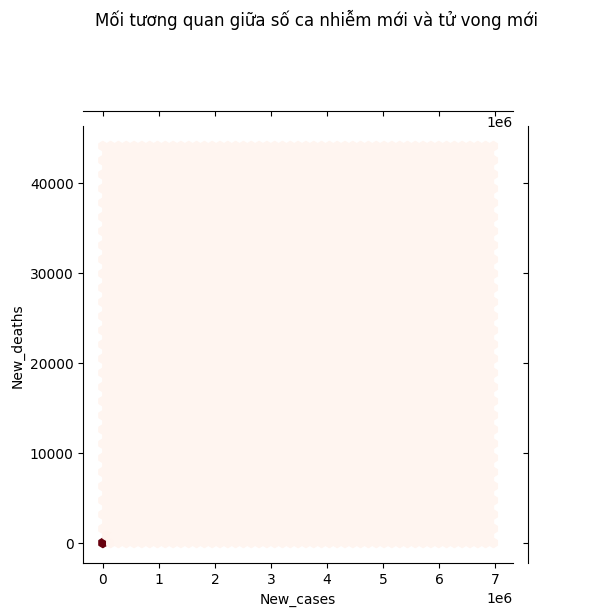

In [ ]:
sns.jointplot(
    data=df[df['Date_reported'] > '2021-01-01'],
    x='New_cases',
    y='New_deaths',
    kind='hex',
    cmap='Reds'
)
plt.suptitle("Mối tương quan giữa số ca nhiễm mới và tử vong mới", y=1.02)
plt.show()
